In [28]:
import numpy as np 
from mnist import MNIST
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import normalize

In [29]:
from display_network import*

In [30]:
# Cach load file MNIST
from mlxtend.data import loadlocal_mnist
X, y = loadlocal_mnist(images_path='D:/Coder/src/MachineLearning/python/K_means/MNIST/t10k-images.idx3-ubyte',
labels_path='D:/Coder/src/MachineLearning/python/K_means/MNIST/t10k-labels.idx1-ubyte')

In [31]:
# Gan X thanh 1000 hang dau tien va chia 256
X0 = np.asarray(X)[:1000,:]/256.0
X = X0
print(X.shape)
K = 10
kmeans = KMeans(n_clusters=K).fit(X)
pred_label = kmeans.predict(X)

(1000, 784)


<class 'numpy.ndarray'>
(784, 10)


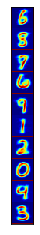

In [32]:
print(type(kmeans.cluster_centers_.T))
print(kmeans.cluster_centers_.T.shape)
A = display_network(kmeans.cluster_centers_.T, K, 1)

f1 = plt.imshow(A, interpolation='nearest', cmap = "jet")
f1.axes.get_xaxis().set_visible(False)
f1.axes.get_yaxis().set_visible(False)
plt.show()

In [33]:
# a color map and a normalization instance
cmap = plt.cm.jet
norm  = plt.Normalize(vmin=A.min(), vmax=A.max())

image = cmap(norm(A))


In [34]:
print(type(pred_label))
print(pred_label.shape)
print(type(X0))
print(X0.shape)

<class 'numpy.ndarray'>
(1000,)
<class 'numpy.ndarray'>
(1000, 784)


In [36]:
N0 = 20;
X1 = np.zeros((N0*K, 784))
X2 = np.zeros((N0*K, 784))

for k in range(K):
    Xk = X0[pred_label == k, :]
    
    center_k = [kmeans.cluster_centers_[k]]
    # fit() tinh toan toi uu cac tham so cua mo hinh
    neigh = NearestNeighbors(N0).fit(Xk)
    dist, nearest_id = neigh.kneighbors(center_k, N0)
    
    X1[N0*k: N0*k + N0,:] = Xk[nearest_id, :]
    X2[N0*k: N0*k + N0,:] = Xk[:N0, :]


E:\miniconda\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=20 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
E:\miniconda\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=20 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
E:\miniconda\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=20 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
E:\miniconda\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=20 as keyword args. From version 1.0 (renaming of 0.25) passing thes

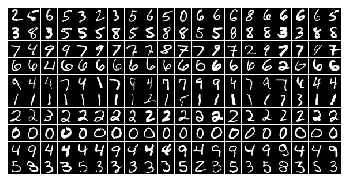

In [37]:
plt.axis('off')
A = display_network(X2.T, K, N0)
f2 = plt.imshow(A, interpolation='nearest' )
plt.gray()
plt.show()


In [8]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.cluster import KMeans

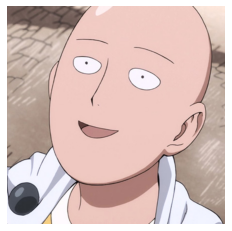

(430, 431, 3)

In [19]:
img = mpimg.imread('boy.jpg')
plt.imshow(img)
implot = plt.imshow(img)
plt.axis('off')
plt.show()
img.shape

In [20]:
X = img.reshape((img.shape[0]*img.shape[1], img.shape[2]))

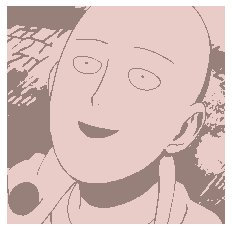

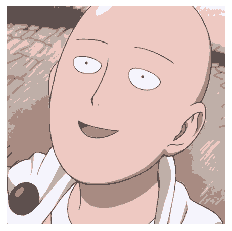

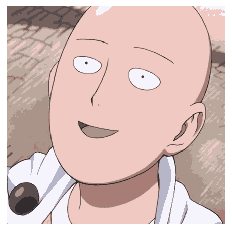

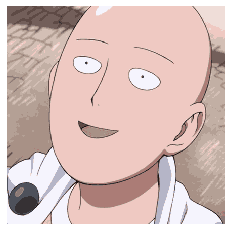

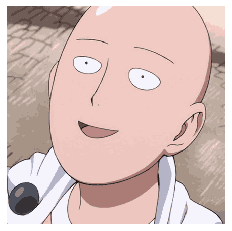

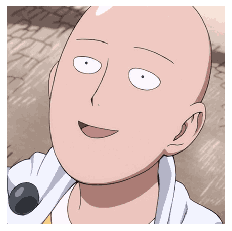

In [21]:
for K in [2, 5, 10, 15, 20, 30]:
    kmeans = KMeans(n_clusters=K).fit(X)
    label = kmeans.predict(X)
    
    img4 = np.zeros_like(X)
    # replace each pixel by its center
    for k in range(K):
        img4[label == k] = kmeans.cluster_centers_[k]
    # reshape and display output image
    img5 = img4.reshape(img.shape[0], img.shape[1], img.shape[2])
    plt.imshow(img5, interpolation='nearest')
    plt.axis('off')
    plt.show()